In [25]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
#Checking fo the correct file
spreadsheet= pd.read_csv('/Users/MARIAM/Downloads/booking_of_hotel.csv')
spreadsheet.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
#The seaborn packages seem broken, hence, the need for reinstallation
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
#To find the missing values in the dataset
spreadsheet.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#Getting information about data columns
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: >

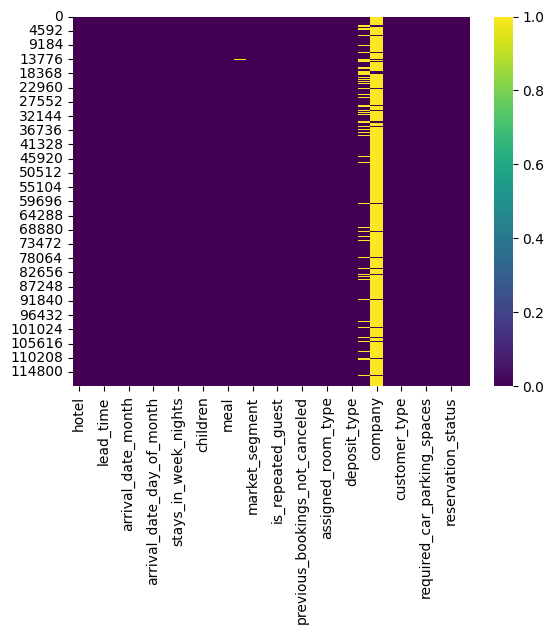

In [26]:
#Visualizing the missing values
sb.heatmap(spreadsheet.isnull(), cbar='False', cmap="viridis")

C:\Users\MARIAM\AppData\Local\Temp\ipykernel_1084\2537472198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(spreadsheet.corr(), cbar=True, annot=True, cmap='Purples')


<Axes: >

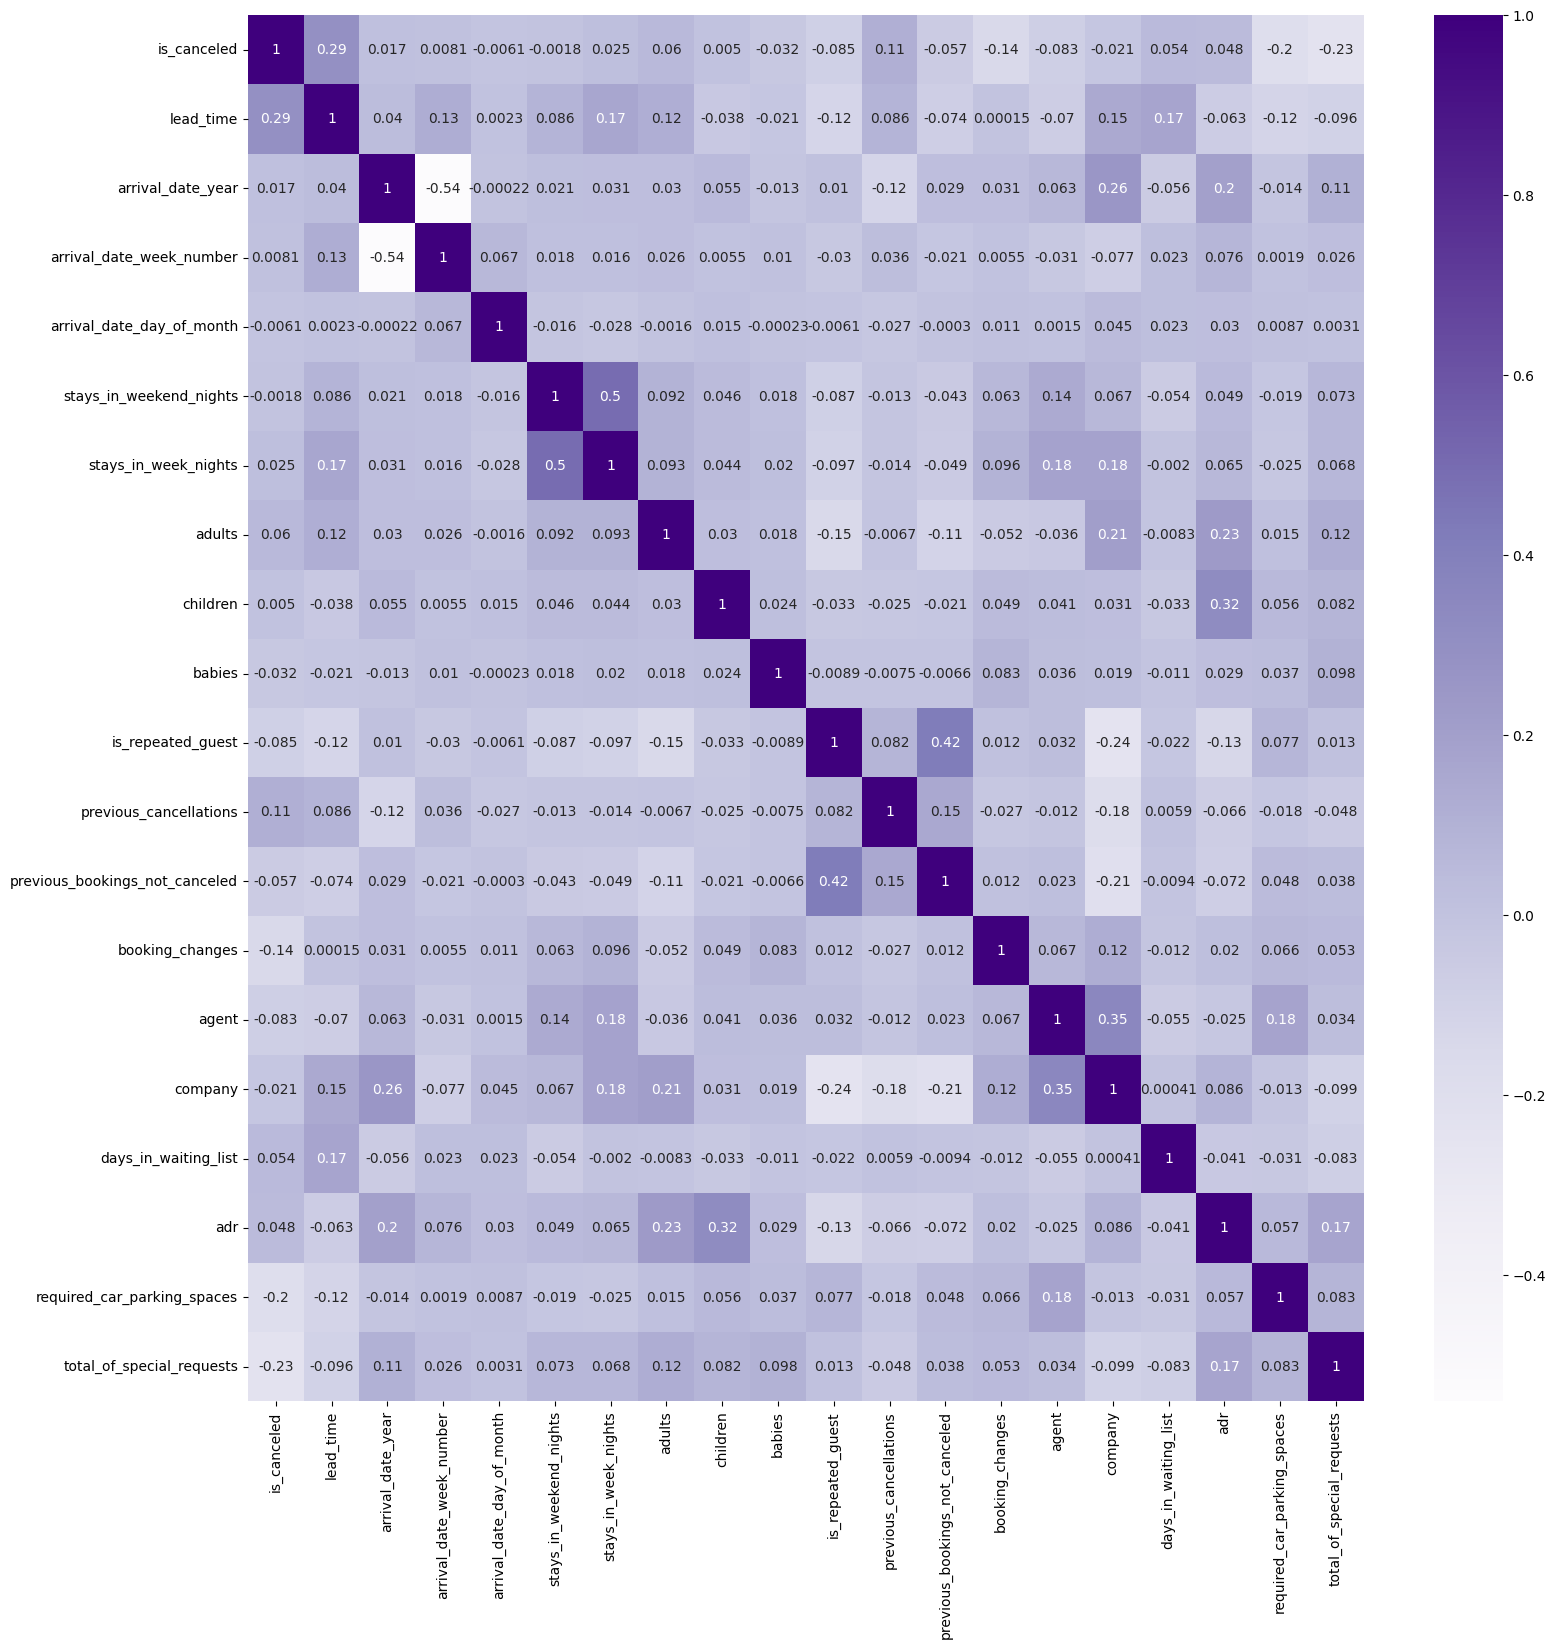

In [33]:
#1
# Checking for the correlation between the varibles in the datasets
plt.figure(figsize=(18,18))
sb.heatmap(spreadsheet.corr(), cbar=True, annot=True, cmap='Purples')

<Axes: xlabel='hotel', ylabel='stays_in_weekend_nights'>

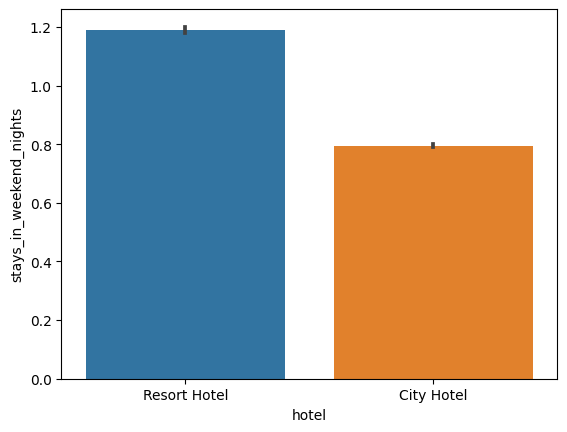

In [35]:
#2
# Answering specific questions like;
# To visualize the overall number of stays in weekend nights in each hotel using barplot.
sb.barplot(x="hotel", y="stays_in_weekend_nights", data=spreadsheet)


<Axes: xlabel='hotel', ylabel='stays_in_week_nights'>

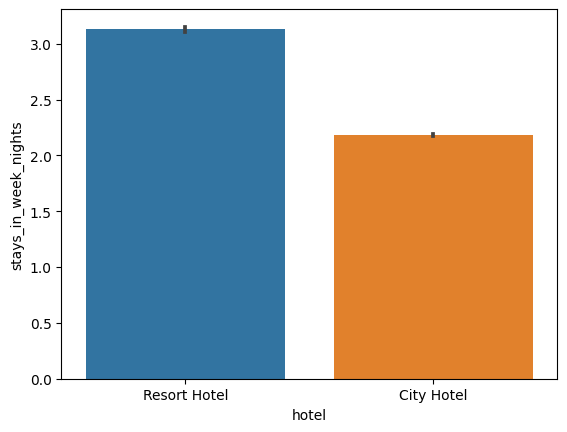

In [36]:
#3
#To visualize the overall number of stays in week nights in each hotel using barplot.
sb.barplot(x="hotel", y="stays_in_week_nights", data=spreadsheet)

Text(0, 0.5, 'Lead time')

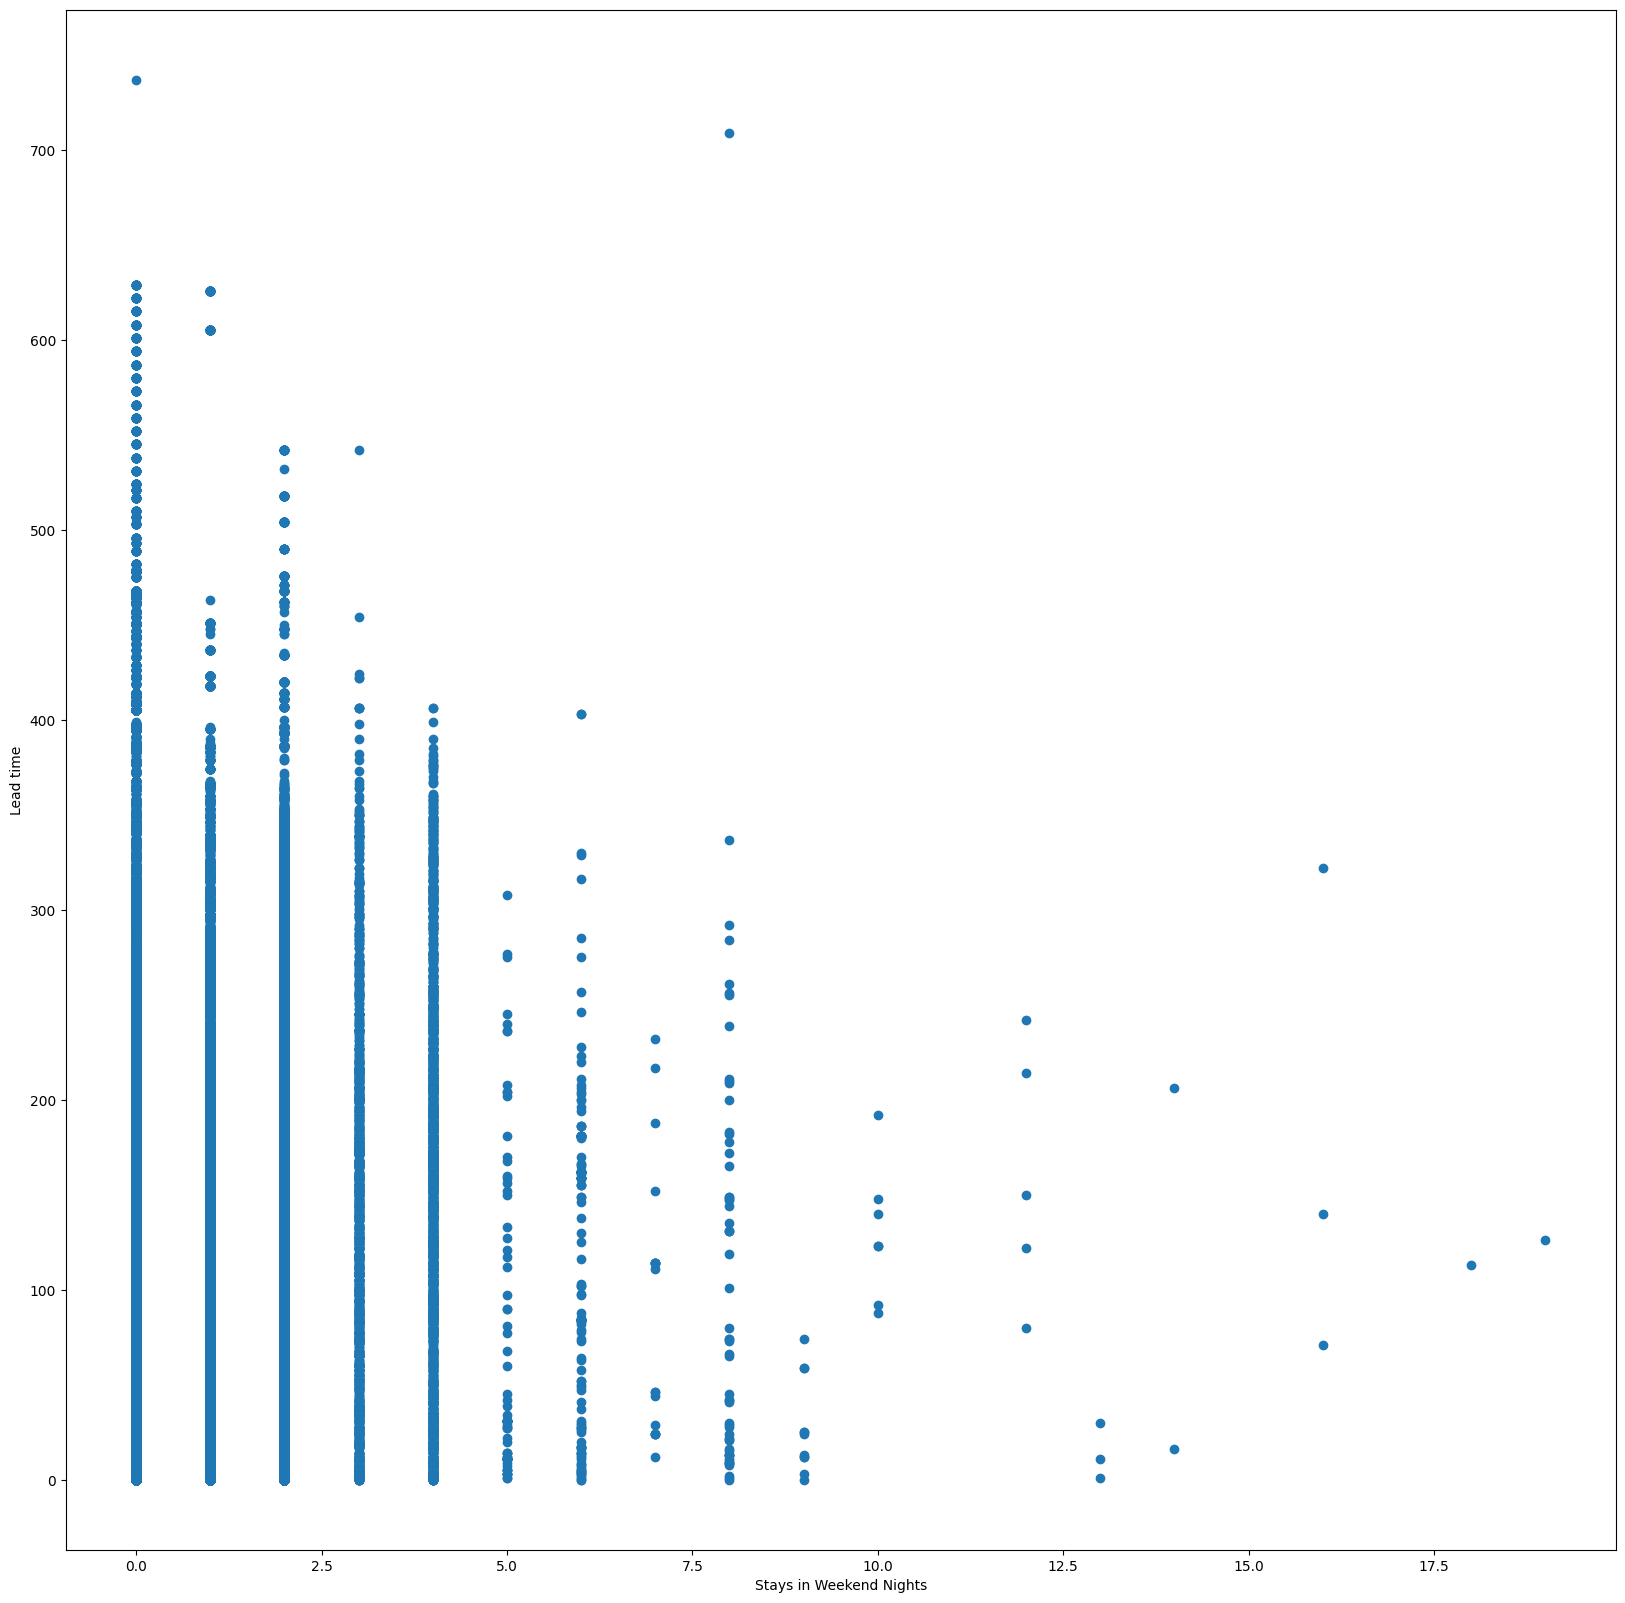

In [43]:
#4
#Plotting scatterplot of stays in weekend nights against lead time
plt.figure(figsize=(20,20))
plt.scatter(x="stays_in_weekend_nights", y="lead_time", data=spreadsheet)
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Lead time')


<Axes: xlabel='stays_in_weekend_nights', ylabel='hotel'>

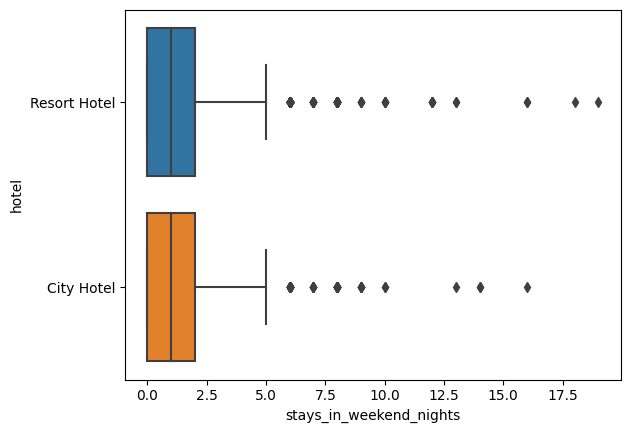

In [56]:
#5
#Visualizing the number of stays in weekend nights for each hotel using boxplot
sb.boxplot(x="stays_in_weekend_nights", y="hotel", data=spreadsheet)

<Axes: xlabel='stays_in_week_nights', ylabel='hotel'>

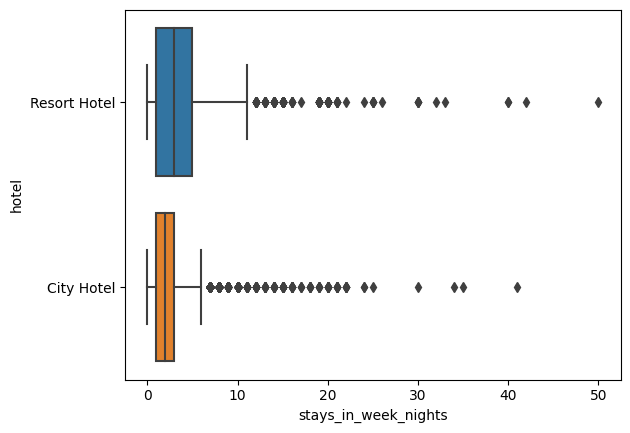

In [57]:
#6
#Visualizing the number of stays in week nights for each hotel using boxplot
sb.boxplot(x="stays_in_week_nights", y="hotel", data=spreadsheet)

In [62]:
#7
#To know the number of country in the dataset
spreadsheet['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

<Figure size 1000x1000 with 0 Axes>

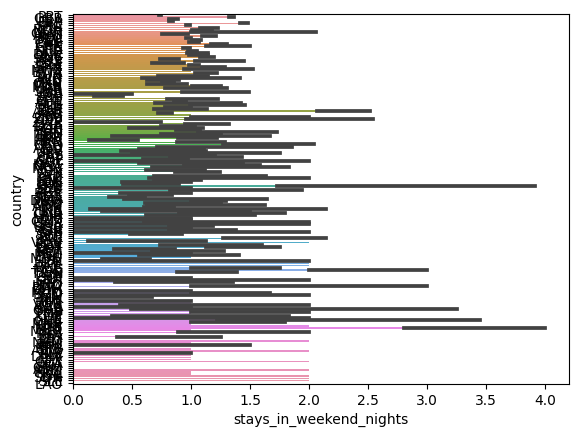

<Figure size 1000x1000 with 0 Axes>

In [51]:
#8
"""Visualizing the relationship between country and lead time (the time between the initiation 
and completion of booking process) using barchart
"""
sb.barplot(x='stays_in_weekend_nights', y='country', data=spreadsheet)
plt.figure(figsize=(10,10))


Text(0.5, 1.0, 'The relationship between stays on week and weekend nights using scatterplot')

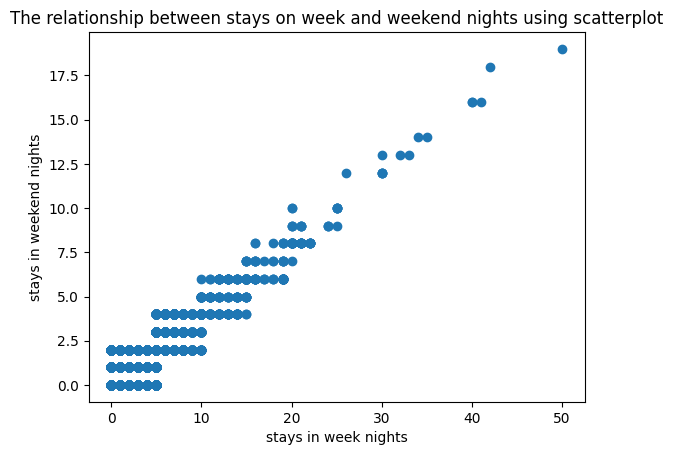

In [68]:
#9
# Findig the relationship between stays on week and weekend nights using scatterplot
plt.scatter(spreadsheet['stays_in_week_nights'], spreadsheet['stays_in_weekend_nights'])

plt.xlabel('stays in week nights')

plt.ylabel('stays in weekend nights')

plt.title('The relationship between stays on week and weekend nights using scatterplot')

<Axes: xlabel='stays_in_week_nights', ylabel='arrival_date_month'>

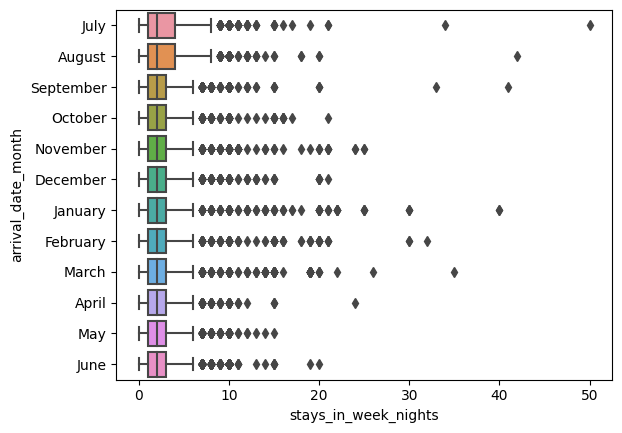

In [70]:
#10
#Findig the relationship between stays on week nights and the arrival month using Boxplot
sb.boxplot(x='stays_in_week_nights', 
           y='arrival_date_month', data=spreadsheet)

<Axes: xlabel='stays_in_weekend_nights', ylabel='arrival_date_month'>

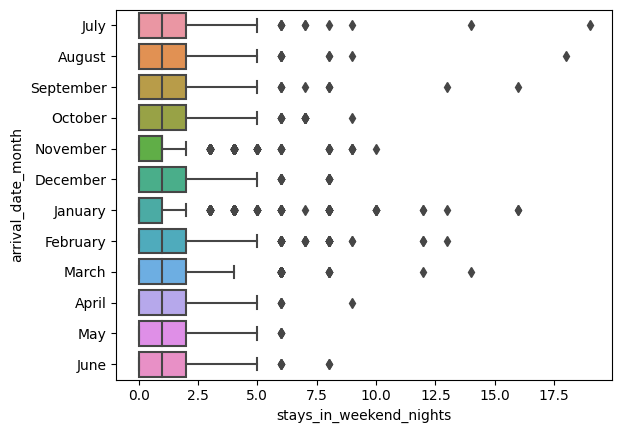

In [72]:
#11
#Findig the relationship between stays on weekend nights and the arrival month using Boxplot
sb.boxplot(x='stays_in_weekend_nights', 
           y='arrival_date_month', data=spreadsheet)